In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

9.667500274409093 132.70270955110095
1.0908795760734051 48.250795009015974
30.204798824675294 104.3309358225701
-72.04370757600017 95.84414495334187
-59.56039375404739 -108.96578096347675
-21.838471430852437 -88.12046130845735
84.17655861331968 139.4310823234013
84.1914150325915 92.38265132321658
36.34500667090694 -111.84998678202234
70.97962454582506 100.20606966053515
-29.139214653721403 15.84197511381285
-24.195829831199603 -165.93013270165142
-81.8872505468226 157.34514876378893
18.296915411089927 173.00743380877702
-85.87649694593526 178.21559256774043
-11.224057135413915 -53.34922822979212
-78.81456752338694 168.75431581596212
32.10798300864961 -134.28089468298776
30.99546597571819 -154.03108146702877
-61.86374396822271 -154.1581012740207
88.12698496362958 143.13627816576866
6.63022156389556 67.67932451942826
55.04795216191937 155.3930472816163
31.2043905233881 -72.51419157276784
65.92991268883748 -89.8232891367549
50.76333407254083 -60.35376792550764
-18.943647301397306 -74.5676

-45.6548177273069 6.280458047042259
-89.85053042899912 61.08359054806169
-57.51486262946341 -51.86203402829949
86.52448022810262 115.16841435084876
-21.319952651672963 144.9208524984469
-26.98528006873501 109.71026536358306
61.97610254375698 -171.26768211314638
18.563553612840494 -151.4276664196704
57.804820866838185 -115.7770248328981
-42.62513966084617 -124.50602493000461
72.96284188242322 74.0856274516764
-6.395133255861495 -57.63944825018892
-35.45791398278587 -33.346371739624686
-52.48938479779962 -165.2323210499651
40.90966516836687 -86.15156034981035
44.324695873633914 -115.63816040234654
-44.66825168857946 -54.98360680632396
-48.30593718167336 7.096765750147824
-10.752081332729986 -43.04471141502671
-11.830507045681998 141.06983316982314
19.39011484436466 -30.868276504908238
28.124302977658573 124.50988824708992
18.624013905332035 -28.825746035050088
25.675383952105804 -132.33883797484094
-84.45077294623698 -95.9203651469285
75.34408616801 36.45052271222016
78.10342831436643 -1

-7.78365448347607 -67.73754295523248
-82.64104715446291 8.082460321511746
-85.07126415515161 63.25770109068688
66.47183036500476 150.13233415649427
35.622651152130345 149.0378887148114
56.70215677015662 13.800699102014988
-77.13838633503833 -11.490924460381649
-49.095473594642854 -52.47256455518627
-45.85755397562453 -10.376068656820564
-69.64187983878165 123.86501516954752
72.61006806827311 -177.67104124800218
72.43129094705859 -26.93628458009485
19.43317722878936 128.1240137988907
-14.587969324961662 45.96185699742719
-68.50796120689972 55.76214666995787
-84.16471039342264 -126.17277233747586
-27.956899859768072 -98.82960411692657
84.2701841792796 -61.10257035720956
-69.03159977411897 156.54630897221705
74.22362298236985 -72.86507878219126
20.22784195126117 158.24145356891398
-60.59095291808735 -70.67837549291579
-0.2594504237913213 58.88329900965729
10.467540534044105 105.49267979247048
48.495117389930556 114.04686270150893
-58.04549371217168 -168.28387449871255
19.048427046002445 1

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [7]:
# Import the requests library
import requests

#Import the API key
from config import api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=272519d1a407604fa8d03337b4a65732


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | meyungs
City not found. Skipping...
Processing Record 2 of Set 1 | mogadishu
Processing Record 3 of Set 1 | jiancheng
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | flagstaff
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | oranjemund
Processing Record 12 of Set 1 | alofi
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | alta floresta
Processing Record 17 of Set 1 | half moon bay
Processing Record 18 of Set 1 | ahuimanu
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | kulhudhuffushi
Processing Record 21 of Set 1 | sobolevo
Processing Record 22 of Set 1 | havelock
Processing Record 23 of Set 1 

Processing Record 38 of Set 4 | port macquarie
Processing Record 39 of Set 4 | monmouth
Processing Record 40 of Set 4 | hobart
Processing Record 41 of Set 4 | tatawin
Processing Record 42 of Set 4 | zambezi
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | kloulklubed
Processing Record 45 of Set 4 | xai-xai
Processing Record 46 of Set 4 | toora-khem
Processing Record 47 of Set 4 | cidreira
Processing Record 48 of Set 4 | mantua
Processing Record 49 of Set 4 | tura
Processing Record 50 of Set 4 | vestmannaeyjar
Processing Record 1 of Set 5 | pangnirtung
Processing Record 2 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 5 | atherton
Processing Record 4 of Set 5 | kirakira
Processing Record 5 of Set 5 | vardo
Processing Record 6 of Set 5 | altamont
Processing Record 7 of Set 5 | alekseyevka
Processing Record 8 of Set 5 | fare
Processing Record 9 of Set 5 | tuatapere
Processing Record 10 of Set 5 | andenes
Processing Record 11 of Set 5 | los

Processing Record 30 of Set 8 | mount darwin
Processing Record 31 of Set 8 | marienburg
Processing Record 32 of Set 8 | nipawin
Processing Record 33 of Set 8 | zima
Processing Record 34 of Set 8 | fountain hills
Processing Record 35 of Set 8 | cabedelo
Processing Record 36 of Set 8 | sorong
Processing Record 37 of Set 8 | orsha
Processing Record 38 of Set 8 | nouakchott
Processing Record 39 of Set 8 | emerald
Processing Record 40 of Set 8 | springfield
Processing Record 41 of Set 8 | grajau
Processing Record 42 of Set 8 | tilichiki
Processing Record 43 of Set 8 | san diego de los banos
Processing Record 44 of Set 8 | mount gambier
Processing Record 45 of Set 8 | sunnyside
Processing Record 46 of Set 8 | zhongshu
Processing Record 47 of Set 8 | katherine
Processing Record 48 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 49 of Set 8 | cape coast
Processing Record 50 of Set 8 | the valley
Processing Record 1 of Set 9 | ilulissat
Processing Record 2 of Set 9 | niquero

Processing Record 19 of Set 12 | kiama
Processing Record 20 of Set 12 | ribeira brava
Processing Record 21 of Set 12 | yermish
Processing Record 22 of Set 12 | denpasar
Processing Record 23 of Set 12 | turukhansk
Processing Record 24 of Set 12 | qasigiannguit
Processing Record 25 of Set 12 | palana
Processing Record 26 of Set 12 | baruun-urt
Processing Record 27 of Set 12 | bukama
Processing Record 28 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 29 of Set 12 | zhangjiakou
Processing Record 30 of Set 12 | zhigansk
Processing Record 31 of Set 12 | antigonish
Processing Record 32 of Set 12 | verkhnetulomskiy
Processing Record 33 of Set 12 | necochea
Processing Record 34 of Set 12 | puerto madero
Processing Record 35 of Set 12 | ankazobe
Processing Record 36 of Set 12 | aripuana
Processing Record 37 of Set 12 | fairbanks
Processing Record 38 of Set 12 | talaja
Processing Record 39 of Set 12 | sao felix do xingu
Processing Record 40 of Set 12 | thinadhoo
Processing Re

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mogadishu,2.0371,45.3438,76.95,83,27,14.09,SO,2022-07-14 20:51:04
1,Jiancheng,30.3910,104.5491,80.31,91,98,4.21,CN,2022-07-14 20:54:32
2,Busselton,-33.6500,115.3333,59.05,76,77,13.80,AU,2022-07-14 20:54:32
3,Punta Arenas,-53.1500,-70.9167,35.62,93,75,2.30,CL,2022-07-14 20:52:30
4,Pisco,-13.7000,-76.2167,66.25,68,0,14.97,PE,2022-07-14 20:54:32
5,Talnakh,69.4865,88.3972,49.21,72,99,2.13,RU,2022-07-14 20:54:33
6,Flagstaff,35.1981,-111.6513,62.40,96,100,4.61,US,2022-07-14 20:51:37
7,Khatanga,71.9667,102.5000,44.10,86,100,2.98,RU,2022-07-14 20:54:33
8,Oranjemund,-28.5500,16.4333,56.43,78,0,9.66,NA,2022-07-14 20:54:34
9,Alofi,-19.0595,-169.9187,76.89,78,75,16.11,NU,2022-07-14 20:54:34


In [13]:
# Reorder the columns: City, Country, Date, Lat, Lng, Max Temp, 
# Humidity, Cloudiness, and Wind Speed, so they are easy to read.
new_column_order = ["City", "Country", "Date", "Lat", 
                    "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign a new or the same DataFrame with new colum order
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mogadishu,SO,2022-07-14 20:51:04,2.0371,45.3438,76.95,83,27,14.09
1,Jiancheng,CN,2022-07-14 20:54:32,30.3910,104.5491,80.31,91,98,4.21
2,Busselton,AU,2022-07-14 20:54:32,-33.6500,115.3333,59.05,76,77,13.80
3,Punta Arenas,CL,2022-07-14 20:52:30,-53.1500,-70.9167,35.62,93,75,2.30
4,Pisco,PE,2022-07-14 20:54:32,-13.7000,-76.2167,66.25,68,0,14.97
5,Talnakh,RU,2022-07-14 20:54:33,69.4865,88.3972,49.21,72,99,2.13
6,Flagstaff,US,2022-07-14 20:51:37,35.1981,-111.6513,62.40,96,100,4.61
7,Khatanga,RU,2022-07-14 20:54:33,71.9667,102.5000,44.10,86,100,2.98
8,Oranjemund,NA,2022-07-14 20:54:34,-28.5500,16.4333,56.43,78,0,9.66
9,Alofi,NU,2022-07-14 20:54:34,-19.0595,-169.9187,76.89,78,75,16.11


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

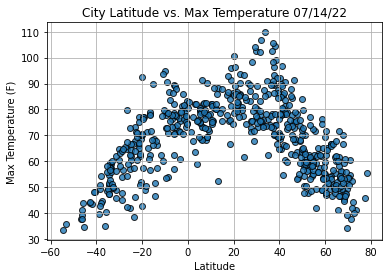

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

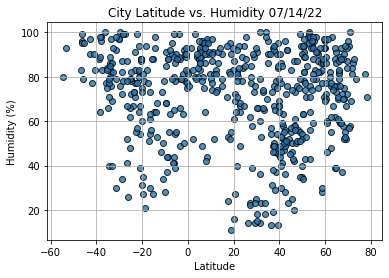

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

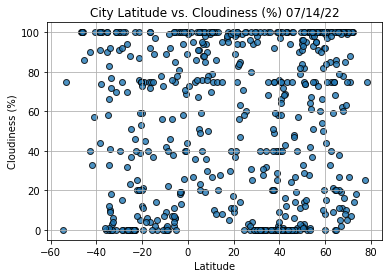

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

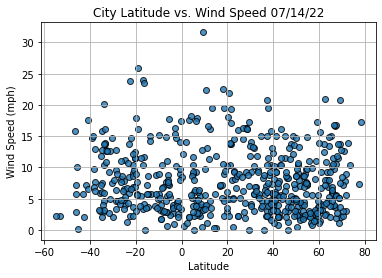

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()